In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
ftr_name_df = pd.read_csv('D:/pythonTest/UCI HAR Dataset/UCI HAR Dataset/features.txt', 
                          sep='\s+', header=None, names=['col_index', 'col_name'])
# 새로운 컬럼명을 넣고 싶을 때 header=None, names=['원하는 컬럼명을 넣어준다']
ftr_name_df.head()

# ftr_name_df에서의 col_name을 name으로 하여
# X_train_df에 적용하기 위한 전처리

ftr_name = ftr_name_df.iloc[:,1].values.tolist()
print('10개의 ftrs:', ftr_name[:10]) # 데이터의 타입은 list

10개의 ftrs: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [5]:
# Duplicate error가 나올 예정

pd.read_csv('D:/pythonTest/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=)


,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7347,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7348,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7349,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [61]:
# 중복된 컬럼들을 전처리 해보자

# 원본 데이터와는 별개의 copy된 df생성
ftr_copy_df = ftr_name_df.copy() 

# 컬럼명 'col_name'에 cumcount함수 적용, 새로운 변수 'ftr_cumcount_col' 선언
# 'ftr_cumcount_col'에 컬럼 'copy_cnt'추가 후 데이터 프레임으로 나타낸다
# 그리고 ftr_copy_df1 이라는 변수에 선언
ftr_cumcount_col = ftr_copy_df.groupby(by='col_name').cumcount()
ftr_copy_df1 = pd.DataFrame(ftr_cumcount_col, columns=['copy_cnt'])

# 공통된 key값(공통 컬럼을 생성하기 위해)_ reset_index를 추가

new_ftrs_df = pd.merge(ftr_copy_df.reset_index(), ftr_copy_df1.reset_index(), how='outer')
new_ftrs_df['column_name'] = new_ftrs_df[['col_name', 'copy_cnt']].apply(lambda x: str(x[0])+'_'+str(x[1]) if int(x[1]) > 0 else x[0], axis=1)

# 중복명이 제거가 되고
# 현재 중복된 이름에 값이 붙은 것을 확인가능
new_ftrs_df[new_ftrs_df['copy_cnt']>0]

# 다시금 ftr_name 변수를 적용하고자 함
ftr_name = new_ftrs_df.iloc[:,-1].values.tolist()
ftr_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [63]:
# Duplicate error를 해결

X_train = pd.read_csv('D:/pythonTest/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=ftr_name)
y_train = pd.read_csv('D:/pythonTest/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', sep='\s+', names=['action'])

In [65]:
X_test = pd.read_csv('D:/pythonTest/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=ftr_name)
y_test = pd.read_csv('D:/pythonTest/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', sep='\s+', names=['action'])

In [134]:
# dt_clf를 적용하여 동작예측을 분류

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)

print(accuracy_score(y_test, pred_dt))

# dt_clf의 하이퍼_파라미터 추출
print('dt_clf_parameters:\n', dt_clf.get_params())

0.8547675602307431
dt_clf_parameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [105]:
# Hyper Parameter 튜닝을 시도
# GridSearchCV

from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()
params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_dt_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_dt_clf.best_params_))


total_time = time.time()-start_time
print('수행시간: {0} 초'.format(total_time))


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼파라미터:{'max_depth': 16}
수행시간: 117.4227933883667 초


In [108]:
# test_data를 적용하여
# max_depth에 따른 값을 확인

max_depths = [6,8,10,12,16,20,24]

cv_results = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred_dt = dt_clf.predict(X_test) # 진짜 test_를 포함해서 돌림
    accuracy_dt = accuracy_score(y_test, pred_dt)
    cv_results.append(accuracy_dt)
    
    print('max_dept = {0} 정확도:{1:.4f}'.format(depth, accuracy_dt))

max_dept = 6 정확도:0.8558
max_dept = 8 정확도:0.8707
max_dept = 10 정확도:0.8673
max_dept = 12 정확도:0.8646
max_dept = 16 정확도:0.8575
max_dept = 20 정확도:0.8548
max_dept = 24 정확도:0.8548


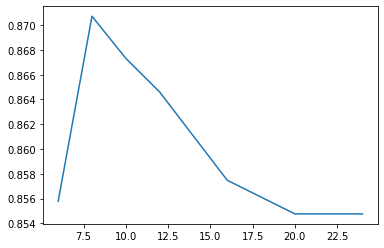

In [109]:
plt.plot([6,8,10,12,16,20,24], cv_results)

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
# rf_clf도 적용
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)
pred_dt = rf_clf.predict(X_test)

print(accuracy_score(y_test, pred_dt))

# rf_clf의 하이퍼_파라미터 추출
print('rf_clf_parameters:\n', rf_clf.get_params())

C:\Users\USER\AppData\Local\Temp/ipykernel_14904/3877970440.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.9236511706820495
rf_clf_parameters:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 156, 'verbose': 0, 'warm_start': False}


In [127]:
# Hyper Parameter 튜닝을 시도
# GridSearchCV

from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()
params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_dt_clf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_dt_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_dt_clf.best_params_))


total_time = time.time()-start_time
print('수행시간: {0} 초'.format(total_time))

GridSearchCV 최고 평균 정확도 수치:0.9176
GridSearchCV 최적 하이퍼파라미터:{'max_depth': 12}
수행시간: 310.25748109817505 초


In [125]:
# test_data를 적용하여
# max_depth에 따른 값을 확인

max_depths = [6,8,10,12,16,20,24]

cv_results2 = []
for depth in max_depths:
    rf_clf = RandomForestClassifier(max_depth=depth, random_state=156)
    rf_clf.fit(X_train, y_train)
    pred_rf = rf_clf.predict(X_test) # 진짜 test_를 포함해서 돌림
    accuracy_rf = accuracy_score(y_test, pred_rf)
    cv_results2.append(accuracy_rf)
    
    print('max_dept = {0} 정확도:{1:.4f}'.format(depth, accuracy_rf))

max_dept = 6 정확도:0.9033
max_dept = 8 정확도:0.9186
max_dept = 10 정확도:0.9237
max_dept = 12 정확도:0.9230
max_dept = 16 정확도:0.9233
max_dept = 20 정확도:0.9277
max_dept = 24 정확도:0.9223


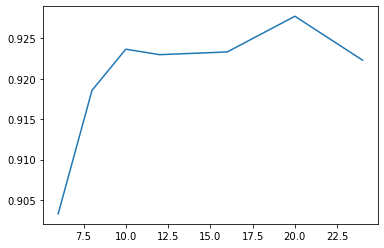

In [126]:
plt.plot([6,8,10,12,16,20,24], cv_results2)

In [130]:
# lr_clf <- 이진분류용
# LogisticRegression :: 데이터가 특정 카테고리에 속할지를 0과 1사이의 연속적인 확률로 예측
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=156)
lr_clf.fit(X_train, y_train)
pred_df = lr_clf.predict(X_train)

print(accuracy_score(y_test, pred_dt))

# rf_clf의 하이퍼_파라미터 추출
print('lr_clf_parameters:\n', lr_clf.get_params())

0.9236511706820495
lr_clf_parameters:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 156, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [131]:
# Hyper Parameter 튜닝을 시도
# GridSearchCV

from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()
params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_dt_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_dt_clf.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:{0}'.format(grid_dt_clf.best_params_))


total_time = time.time()-start_time
print('수행시간: {0} 초'.format(total_time))

ValueError: Invalid parameter max_depth for estimator LogisticRegression(random_state=156). Check the list of available parameters with `estimator.get_params().keys()`.